In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
from scipy.stats import variation

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
import sklearn
from sklearn.metrics import mean_squared_error

In [12]:
data = pd.read_excel('global_superstore.xlsx')

In [13]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Data Preparation

Combining the 'Market' and 'Segment' columns as new column 'Market_Segment'

In [14]:
data['Market_Segment']=data['Market'] + "-" + data['Segment']

In [15]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Market_Segment
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,USCA-Consumer
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Asia Pacific-Corporate
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,Asia Pacific-Consumer
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,Europe-Home Office
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,Africa-Consumer


In [16]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Market_Segment'],
      dtype='object')

In [17]:
data.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Discount','Shipping Cost', 'Order Priority'],axis=1,inplace=True)

In [18]:
data

,Order Date,Sales,Profit,Market_Segment
0,2014-11-11,221.980,62.1544,USCA-Consumer
1,2014-02-05,3709.395,-288.7650,Asia Pacific-Corporate
2,2014-10-17,5175.171,919.9710,Asia Pacific-Consumer
3,2014-01-28,2892.510,-96.5400,Europe-Home Office
4,2014-11-05,2832.960,311.5200,Africa-Consumer
...,...,...,...,...
51285,2015-06-19,65.100,4.5000,Asia Pacific-Corporate
51286,2014-05-06,16.720,3.3440,USCA-Consumer
51287,2012-08-26,8.560,2.4824,USCA-Consumer
51288,2013-02-17,13.440,2.4000,LATAM-Home Office


Spliting the date time into monthly based

In [20]:
data['Order Date'] =pd.to_datetime(data['Order Date']).dt.to_period('m')

In [21]:
data.head()

,Order Date,Sales,Profit,Market_Segment
0,2014-11,221.980,62.1544,USCA-Consumer
1,2014-02,3709.395,-288.7650,Asia Pacific-Corporate
2,2014-10,5175.171,919.9710,Asia Pacific-Consumer
3,2014-01,2892.510,-96.5400,Europe-Home Office
4,2014-11,2832.960,311.5200,Africa-Consumer


In [22]:
data_cov = pd.pivot_table(data = data,index ="Order Date",columns="Market_Segment",values="Profit",aggfunc =sum)

In [23]:
data_cov

Market_Segment,Africa-Consumer,Africa-Corporate,Africa-Home Office,Asia Pacific-Consumer,Asia Pacific-Corporate,Asia Pacific-Home Office,Europe-Consumer,Europe-Corporate,Europe-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,USCA-Consumer,USCA-Corporate,USCA-Home Office
Order Date,,,,,,,,,,,,,,,
2012-01,475.683,219.096,856.710,-1162.5915,564.8418,202.8423,-791.3190,1504.2015,975.3600,1976.98976,1150.88400,-106.48800,765.9267,306.6145,1383.0499
2012-02,1441.926,-519.264,820.302,1545.7371,4741.9974,-307.6428,-822.6780,4317.6585,101.4570,902.37752,721.25420,300.19936,791.1401,307.2995,-18.7030
2012-03,322.140,-558.003,67.320,4044.8529,1060.6806,1063.2462,3008.6010,237.2610,291.5550,2598.55924,-173.74088,285.46400,685.6373,338.7875,-182.7339
2012-04,292.122,776.691,500.136,3521.6376,120.6465,51.1530,2368.3185,1412.6145,225.2880,374.34148,472.07200,-421.73440,1189.8021,1387.6468,940.3767
2012-05,120.204,241.338,34.926,3314.4903,2057.2572,-174.5550,1057.4805,2316.5520,736.0320,1002.34724,-355.94444,-99.47600,1015.2909,2142.3861,1235.7535
2012-06,-1300.839,-324.162,-774.801,3662.3436,1740.5094,507.5631,4820.9715,3763.5090,1189.1730,1039.27972,2567.90696,503.05764,3255.8626,103.5433,186.6808
2012-07,511.992,26.172,-506.562,-1159.1568,737.5047,-23.2998,891.9300,919.1100,521.4570,1906.45620,118.05032,363.28400,-2173.0854,1819.3474,87.4072
2012-08,344.973,1095.984,1090.200,1537.7121,3716.3181,891.2976,7212.1635,2058.2670,248.0520,1950.49372,228.44028,661.27592,2280.4592,2224.4090,912.9520
2012-09,-84.393,1356.486,1345.740,4234.2159,1121.4135,1114.5975,7039.6785,5266.7925,3110.2410,1675.66132,304.83100,179.78944,8360.1901,-944.8010,964.0801


In [25]:
data_cov.shape

(48, 15)

Among those 48 rows data, we will train 42 rows and test with the rest 6

In [27]:
train_len = 42
train = data_cov[0:train_len]
test = data_cov[train_len:]

In [28]:
train.shape

(42, 15)

In [29]:
test.shape

(6, 15)

In [30]:
data_con = data[data['Market_Segment']=='Asia Pacific-Consumer']

In [31]:
data_con

,Order Date,Sales,Profit,Market_Segment
2,2014-10,5175.171,919.971,Asia Pacific-Consumer
6,2012-11,1822.080,564.840,Asia Pacific-Consumer
7,2013-04,5244.840,996.480,Asia Pacific-Consumer
12,2012-12,2616.960,1151.400,Asia Pacific-Consumer
14,2014-06,3701.520,1036.080,Asia Pacific-Consumer
...,...,...,...,...
51244,2012-12,4.050,-5.130,Asia Pacific-Consumer
51245,2012-11,17.280,-13.920,Asia Pacific-Consumer
51248,2014-07,30.618,1.008,Asia Pacific-Consumer
51255,2014-08,4.560,0.000,Asia Pacific-Consumer


In [33]:
data1 =data_con.groupby(data['Order Date'])['Sales'].sum()
data1

Order Date
2012-01    18184.7985
2012-02    14908.4271
2012-03    21497.9829
2012-04    16501.3476
2012-05    24945.3603
2012-06    29869.3836
2012-07    20746.6032
2012-08    29868.6321
2012-09    32658.2859
2012-10    43806.6270
2012-11    39234.6801
2012-12    45088.2939
2013-01    33519.6675
2013-02    25722.5481
2013-03    16659.6921
2013-04    23241.1911
2013-05    37065.1272
2013-06    52207.7352
2013-07     8871.5376
2013-08    54004.6857
2013-09    31696.3866
2013-10    59304.8103
2013-11    58068.9180
2013-12    49145.5647
2014-01    36668.5860
2014-02    21880.5978
2014-03    30197.6769
2014-04    26509.8417
2014-05    50245.8960
2014-06    80907.1419
2014-07    39733.6587
2014-08    50435.4339
2014-09    55000.0395
2014-10    57924.1842
2014-11    58932.9864
2014-12    57200.4804
2015-01    44484.4296
2015-02    27751.8876
2015-03    49591.5276
2015-04    35916.6042
2015-05    60654.1608
2015-06    59116.8351
2015-07    40686.8388
2015-08    74904.9099
2015-09    55235.7672

In [34]:
data1 =pd.DataFrame(data1)

In [35]:
data1

,Sales
Order Date,
2012-01,18184.7985
2012-02,14908.4271
2012-03,21497.9829
2012-04,16501.3476
2012-05,24945.3603
2012-06,29869.3836
2012-07,20746.6032
2012-08,29868.6321
2012-09,32658.2859


In [37]:
data1.index = data1.index.to_timestamp()

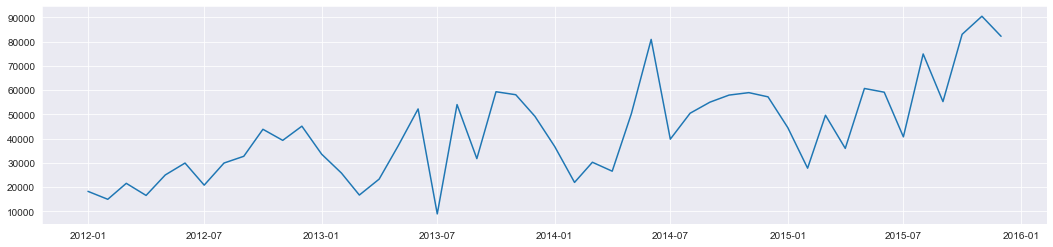

In [38]:
plt.figure(figsize =(18,4))
plt.plot(data1,label='Sales')

In [39]:
from pylab import rcParams
import statsmodels.api as sm

In [40]:
decomposition = sm.tsa.seasonal_decompose(data1.Sales,model='additive')

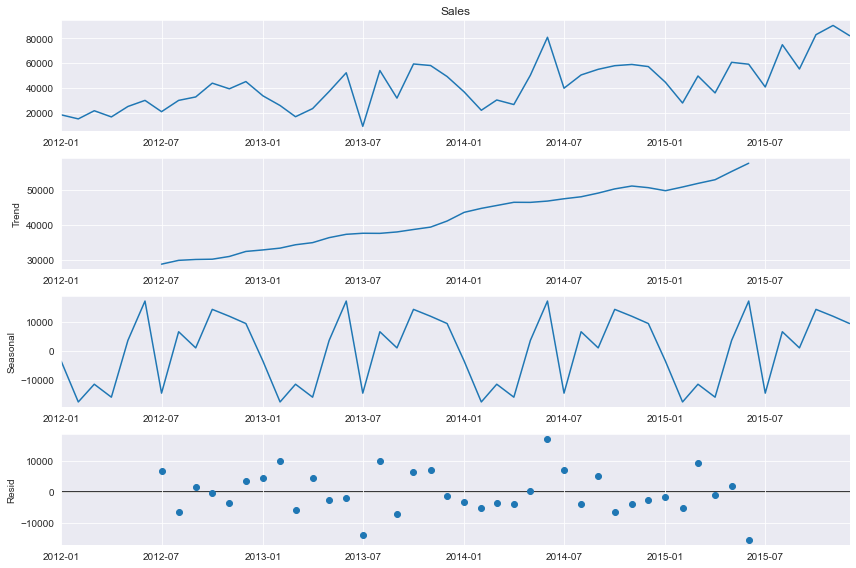

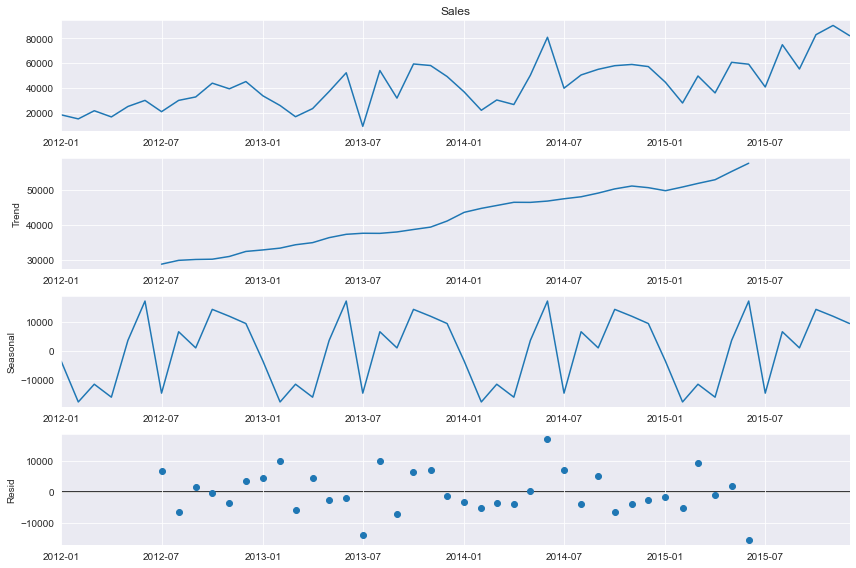

In [41]:
rcParams['figure.figsize'] = 12,8
decomposition.plot()

# Simple Moving Average

In [43]:
train_len = 42
train = data1[0:train_len]
test = data1[train_len:]

In [44]:
y_hat_avg =test.copy()
y_hat_avg['avg_forecast'] =train['Sales'].mean()

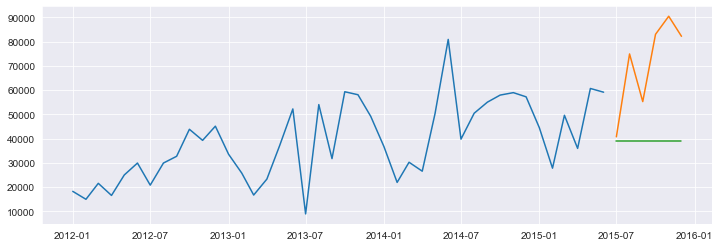

In [45]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label ='Train')
plt.plot(test['Sales'],label ='Test')
plt.plot(y_hat_avg['avg_forecast'],label ='simple avg')
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })

In [47]:
tempResults

,Method,RMSE,MAPE
0,Simple average method,36698.58,40.95


# Simple Exponenctial Smoothing

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [49]:
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized =True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast']=model_fit.forecast(len(test))

C:\Users\Sang Pui\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


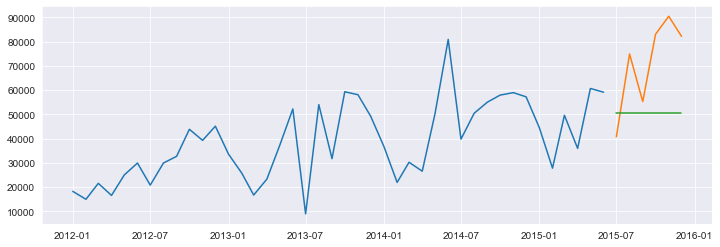

In [50]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label ='Train')
plt.plot(test['Sales'],label ='Test')
plt.plot(y_hat_ses['ses_forecast'],label ='simple exponential smoothing')
plt.show()

In [51]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Expo Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })


In [52]:
tempResults

,Method,RMSE,MAPE
0,Expo Smoothing,27064.63,31.26


# Exponential Smoothing

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']),seasonal_periods = 12,trend = 'add',
                            seasonal ='add')

In [55]:
model_fit = model.fit(optimized =True)
model_fit.params
y_hat_hwa = test.copy()
y_hat_hwa['hw_forecast']=model_fit.forecast(len(test))

C:\Users\Sang Pui\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


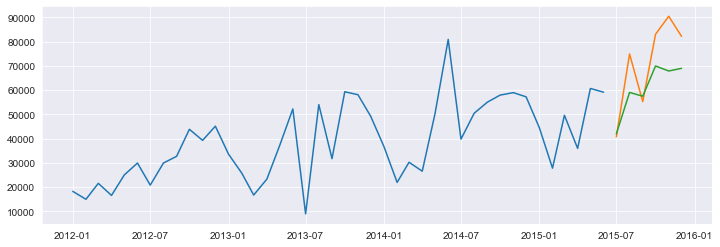

In [56]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label ='Train')
plt.plot(test['Sales'],label ='Test')
plt.plot(y_hat_hwa['hw_forecast'],label ='HW Forecast')
plt.show()

In [57]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winter'], 'RMSE': [rmse],'MAPE': [mape] })


In [58]:
tempResults

,Method,RMSE,MAPE
0,Holt Winter,13635.93,14.19


# SARIMAX

In [61]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'],lmbda =0),index =data1.index)
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(),data1.index)
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [64]:
model = SARIMAX(train_data_boxcox,order=(1,1,1),
               seasonal_order =(1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.110854
ma.L1      -0.996322
ar.S.L12   -0.538206
ma.S.L12   -0.990119
sigma2      0.035119
dtype: float64


In [65]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

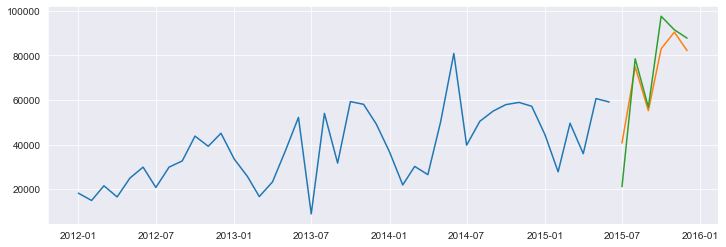

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')